In [1]:
import Pkg
Pkg.activate(".")
Pkg.add("Distributions")
Pkg.add("Statistics")
Pkg.add("StatsBase")
Pkg.add("ARFFFiles")
Pkg.add("DataFrames")
Pkg.add("ScikitLearn")
Pkg.add("ProfileSVG")
Pkg.add("Plots")
Pkg.resolve();

  Activating project at `/Volumes/lodygaw/2022/learning/wdum`
    Updating registry at `~/.julia/registries/General`
    Updating git-repo `https://github.com/JuliaRegistries/General`
   Resolving package versions...
  No Changes to `/Volumes/lodygaw/2022/learning/wdum/Project.toml`
  No Changes to `/Volumes/lodygaw/2022/learning/wdum/Manifest.toml`
   Resolving package versions...
  No Changes to `/Volumes/lodygaw/2022/learning/wdum/Project.toml`
  No Changes to `/Volumes/lodygaw/2022/learning/wdum/Manifest.toml`
   Resolving package versions...
  No Changes to `/Volumes/lodygaw/2022/learning/wdum/Project.toml`
  No Changes to `/Volumes/lodygaw/2022/learning/wdum/Manifest.toml`
   Resolving package versions...
  No Changes to `/Volumes/lodygaw/2022/learning/wdum/Project.toml`
  No Changes to `/Volumes/lodygaw/2022/learning/wdum/Manifest.toml`
   Resolving package versions...
  No Changes to `/Volumes/lodygaw/2022/learning/wdum/Project.toml`
  No Changes to `/Volumes/lodygaw/2022/learn

In [2]:
using ScikitLearn
@sk_import linear_model : RidgeClassifierCV

┌ Info: Running `conda install -y -c conda-forge llvm-openmp` in root environment
└ @ Conda /Users/lodygaw/.julia/packages/Conda/x2UxR/src/Conda.jl:127


Solving environment: ...working... done

# All requested packages already installed.



PyObject <class 'sklearn.linear_model._ridge.RidgeClassifierCV'>

In [62]:
include("datasets.jl")
X_train, y_train, X_test, y_test = load_dataset("Cricket");

┌ Info: Loading dataset: Cricket, scope: train
└ @ Main /Volumes/lodygaw/2022/learning/wdum/datasets.jl:39
┌ Info: Dataset size: 
│ 	Instances: 108 
│ 	Columns: 6 
│ 	Timepoints: 1197
└ @ Main /Volumes/lodygaw/2022/learning/wdum/datasets.jl:48
┌ Info: Loading dataset: Cricket, scope: test
└ @ Main /Volumes/lodygaw/2022/learning/wdum/datasets.jl:39
┌ Info: Dataset size: 
│ 	Instances: 72 
│ 	Columns: 6 
│ 	Timepoints: 1197
└ @ Main /Volumes/lodygaw/2022/learning/wdum/datasets.jl:48


In [63]:
ranges = [Interval{Closed, Closed}(0.1, 0.4),
          Interval{Open, Closed}(0.4, 0.7),
          Interval{Open, Closed}(0.7,1.0)]

trim_timeseries!(X_train, y_train, ranges)
trim_timeseries!(X_test, y_test, ranges)

# show_stratification(X_train, y_train)

In [64]:
include("forecast.jl")

target_length = 1100

X_train_forecasted_org = forecast(Original, X_train, target_length, 4, 3)
X_test_forecasted_org = forecast(Original, X_test, target_length, 4, 3)

X_train_forecasted_mean = forecast(Mean, X_train, target_length)
X_test_forecasted_mean = forecast(Mean, X_test, target_length)

72×6×1100 Array{Float32, 3}:
[:, :, 1] =
 -0.7005   -0.49244   -0.58608   -0.44382   0.66156   -0.22074
 -0.85801  -0.12735   -0.34155   -0.4933    0.45586   -0.1574
 -0.37458   0.40771   -0.27929   -0.13219  -0.34596   -0.60197
 -0.41039   0.24499   -0.07809   -0.12654  -0.15114   -0.37116
 -0.71832  -0.14954   -0.4244    -0.37109   0.51903   -0.36629
 -0.68622  -0.27868   -0.46384   -0.42062   0.52834   -0.3757
  0.17108  -0.40626   -0.21893    0.85099   0.30728    0.090377
  0.43485   0.071961   0.30086    1.243    -0.18343    0.46985
  0.4429   -0.32067    0.32728    0.23203   0.048278   0.59717
  0.26845  -0.23       0.21602    0.85265   0.24327    0.24421
  0.17338  -0.34942    0.51468    1.1448    0.075665   0.60677
  0.27512  -0.0386     0.60837    0.24083   0.10005    0.28409
  1.2068   -0.087586   0.66054   -0.40983   0.92523   -0.40544
  ⋮                                                    ⋮
 -0.98409  -0.002865  -1.1956    -0.60861   0.4284    -1.0959
 -1.0023   -0.21169   

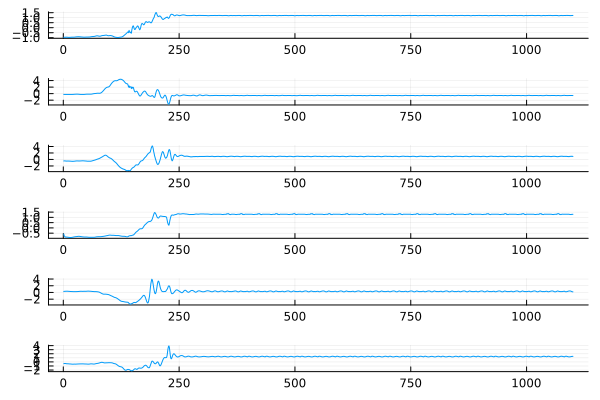

In [65]:
plot_timeseries(X_train_forecasted_org[1,:,:])

In [66]:
include("rocket.jl")
rocket_org = Rocket()
rocket_mean = Rocket()
fit!(rocket_org, X_train_forecasted_org);
fit!(rocket_mean, X_train_forecasted_mean);

In [67]:
X_train_transform_org = transform!(rocket_org, X_train_forecasted_org)
X_train_transform_mean = transform!(rocket_mean, X_train_forecasted_mean)

108×20000 Matrix{Float32}:
 0.07        7.11734  0.886364   7.0362   …  6.62174  0.251818   21.0029
 0.0918182   9.94374  0.815455   2.9551      6.60735  0.316364   10.6932
 0.1         3.61507  0.869091   1.95866     6.31445  0.325455    6.08052
 0.0418182   6.44556  0.938182   3.64483     1.50761  0.0909091   4.44172
 0.0154545   6.65789  0.922727   3.58647     1.75801  0.111818    4.64523
 0.12       11.3449   0.786364   4.34708  …  5.9958   0.300909   16.1798
 0.101818    7.13798  0.825455   3.26229     7.91721  0.288182   10.1334
 0.09        5.41087  0.825455   2.67389     6.28274  0.28        7.52763
 0.0981818   1.56455  0.795455   2.8797      6.38782  0.365455   12.2668
 0.461818    4.80151  0.899091  12.1188      6.65746  0.106364    8.7335
 0.138182    6.45209  0.719091   7.74037  …  6.58725  0.311818    9.41338
 0.134545    3.95809  0.717273   6.1382      5.97107  0.363636    7.37354
 0.125455    2.67576  0.711818   5.50114     5.51437  0.300909    8.88702
 ⋮               

In [68]:
X_test_transform_org = transform!(rocket_org, X_test_forecasted_org)
X_test_transform_mean = transform!(rocket_mean, X_test_forecasted_mean)

72×20000 Matrix{Float32}:
 0.0863636    9.45988  0.864545  2.02755  …  5.07808  0.316364    6.08975
 0.0590909    5.70864  0.891818  1.77568     6.86729  0.186364   10.3738
 0.07         2.31141  0.835455  3.07428     5.49831  0.350909    9.212
 0.114545     8.94519  0.809091  3.27652     6.14011  0.280909   12.1428
 0.0972727    4.00465  0.871818  2.59815     5.85011  0.319091    7.5722
 0.0518182    4.45414  0.919091  2.07319  …  5.9105   0.138182    6.80843
 0.154545     1.85981  0.727273  6.91506     7.12885  0.341818    8.18734
 0.123636     2.3668   0.763636  6.70031     6.94115  0.259091    8.94785
 0.03         7.63553  0.930909  3.16932     4.43914  0.0609091  22.4009
 0.0936364    1.90979  0.852727  8.23153     3.62274  0.205455    5.91597
 0.136364     5.4814   0.761818  7.2371   …  5.22202  0.266364   10.7942
 0.107273    13.4051   0.747273  6.74332     6.57506  0.299091    8.86788
 0.201818     4.61185  0.787273  2.72158     3.95239  0.294545    7.1842
 ⋮                  

In [69]:
alphas = [1.00000000e-03, 4.64158883e-03, 2.15443469e-02, 1.00000000e-01,
       4.64158883e-01, 2.15443469e+00, 1.00000000e+01, 4.64158883e+01,
       2.15443469e+02, 1.00000000e+03]

ridge_org = RidgeClassifierCV(alphas=alphas, normalize=true);
ridge_mean = RidgeClassifierCV(alphas=alphas, normalize=true);

ridge_org.fit(X_train_transform_org, y_train)
ridge_mean.fit(X_train_transform_mean, y_train)


score_org = ridge_org.score(X_test_transform_org, y_test)
score_mean = ridge_mean.score(X_test_transform_mean, y_test)

println(score_org)
println(score_mean)

/Users/lodygaw/.julia/conda/3/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), _RidgeGCV())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


0.8888888888888888